<a href="https://colab.research.google.com/github/HammadN98/Agrupamento-de-clientes/blob/main/notebooks/E_commerce_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Pre-processamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Agrupamento-de-clientes/refs/heads/main/dados/E-commerce_CustomerBehavior.csv")
dados

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## 1. Conhecendo os dados

In [3]:
dados.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
dados.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


## 2. Limpeza dos dados

In [6]:
dados = dados.drop(columns='Customer ID')

### 2.1 Removendo valores nulos

A categoria 'Satisfaction Level' e a unica que possui valore nulos

In [7]:
dados['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

Tratando-se de uma categoria ordinal a mesma sera removida

In [8]:
dados = dados.dropna(subset=['Satisfaction Level'])
dados.shape

(348, 10)

### 2.2 VErificando a existencia de duplicatas

In [9]:
dados.duplicated().sum()

180

nada duplicado

### 2.3 Analisando outiliers

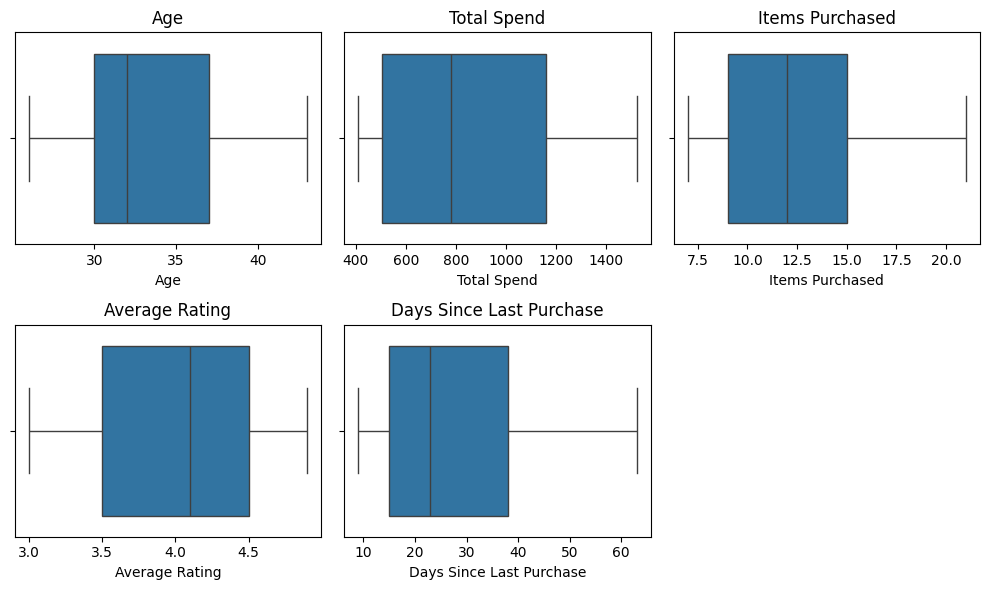

In [10]:
num_columns = dados.select_dtypes(include=['float64', 'int']).columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, (len(num_columns) + 1) // 2, i)
    sns.boxplot(x=dados[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Outliers nao encontrados visualmente

## 3. Padronizacao das variaveis numericas

In [11]:
scaler = StandardScaler()

#num_columns = colunas numericas
dados[num_columns] = scaler.fit_transform(dados[num_columns])

dados_numericos_normalizados = dados[num_columns]
dados_numericos_normalizados

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,-0.939761,0.754230,0.330381,0.996757,-0.120022
1,0.086720,-0.186319,-0.394236,0.132172,-0.640260
2,1.934386,-0.933192,-0.877314,-1.078247,1.143413
3,-0.734465,1.751261,1.538076,1.169674,-1.086179
4,-1.350354,-0.352721,0.088842,-0.040745,2.109570
...,...,...,...,...,...
345,-0.323873,-0.519124,-0.635775,-0.386579,1.143413
346,0.497312,-1.044635,-1.118853,-1.769915,0.028617
347,-0.734465,0.949704,0.813459,0.823840,0.102937
348,0.086720,-0.187149,-0.394236,0.305089,-0.417301


## 4. K-measn apenas com as variveis numericas originais apos a normalizacao

### 4.1 Numero de K usando o metodo do cotovelo

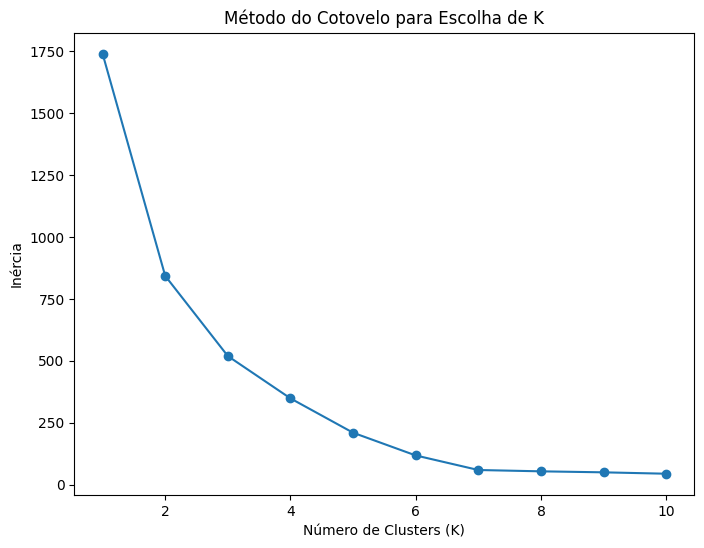

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir o intervalo de valores de K para testar
range_n_clusters = range(1, 11)
inertia = []

# Calcular a inércia para cada valor de K
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dados[num_columns])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de K')
plt.show()


K = 4, pois representa o ponto que apartir dele a inercia diminui mais lentamente

### 4.2 K-means

In [13]:
# Configurar e rodar o K-means com K=4, valor obtido acima
kmeans = KMeans(n_clusters=4, random_state=42)
dados['Cluster'] = kmeans.fit_predict(dados[num_columns])

dados.head()


,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
0,Female,-0.939761,New York,Gold,0.754230,0.330381,0.996757,True,-0.120022,Satisfied,1
1,Male,0.086720,Los Angeles,Silver,-0.186319,-0.394236,0.132172,False,-0.640260,Neutral,3
2,Female,1.934386,Chicago,Bronze,-0.933192,-0.877314,-1.078247,True,1.143413,Unsatisfied,0
3,Male,-0.734465,San Francisco,Gold,1.751261,1.538076,1.169674,False,-1.086179,Satisfied,1
4,Male,-1.350354,Miami,Silver,-0.352721,0.088842,-0.040745,True,2.109570,Unsatisfied,2


### 4.3 Analise dos clusters

In [14]:
# Estatísticas descritivas por cluster
cluster_summary = dados.groupby('Cluster')[num_columns].mean()
display(cluster_summary)


,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Cluster,,,,,
0,1.196040,-1.034325,-0.993846,-1.205660,0.383918
1,-0.750257,1.282909,1.203637,1.126815,-0.644707
2,-1.255602,-0.414393,-0.053604,-0.058480,1.848498
3,0.005128,-0.205462,-0.326110,0.101136,-0.518300


para referencia ao ler a tabela acima:

* **Entre -1 e 1:** Esse intervalo cobre aproximadamente 68% dos dados em uma distribuição normal, então valores dentro desse intervalo não se afastam tanto da média e podem ser considerados "próximos da média".

* **Entre -2 e -1 ou entre 1 e 2:** Valores nesse intervalo estão entre 1 e 2 desvios padrões da média, o que representa aproximadamente 27% dos dados na distribuição normal (ou seja, já um grupo menor). Esses valores começam a indicar um desvio mais notável em relação à média.

* **Abaixo de -2 ou acima de 2:** Valores que se afastam da média em mais de 2 desvios padrões são bastante extremos e representam aproximadamente apenas 5% dos dados em uma distribuição normal. Esses valores são geralmente considerados muito fora da média e indicam características bastante distintas para esse cluster.

## 5. Entendendo os resultados

* Cluster 0: Clientes de baixo gasto e pouca frequência de compra.
* Cluster 1: Clientes de alto gasto, compram com frequência, e estão mais satisfeitos.
* Cluster 2: Clientes mais jovens que compram com pouca frequência.
* Cluster 3: Clientes medianos em gasto, frequência e satisfação.


## 6. Visualizando os clusters formados


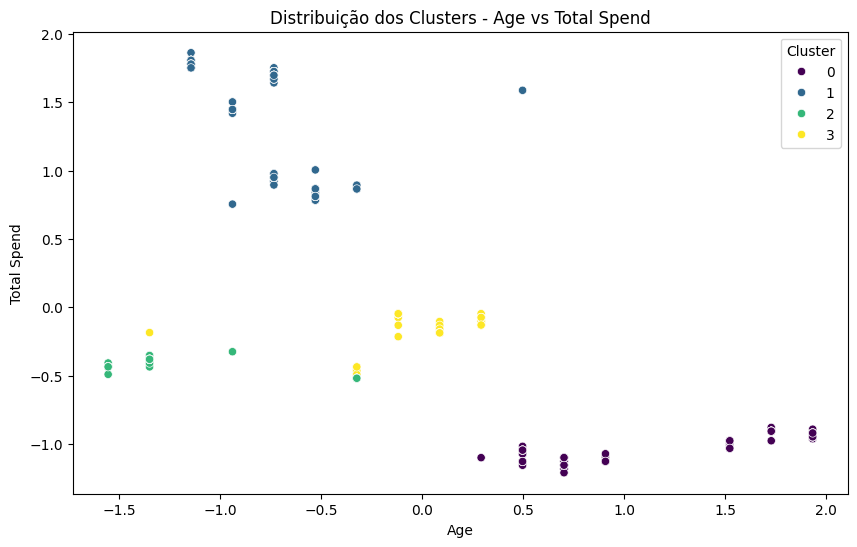

In [15]:
# Dispersão de Total Spend vs Age, colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Age', y='Total Spend', hue='Cluster', palette='viridis')
plt.title('Distribuição dos Clusters - Age vs Total Spend')
plt.show()


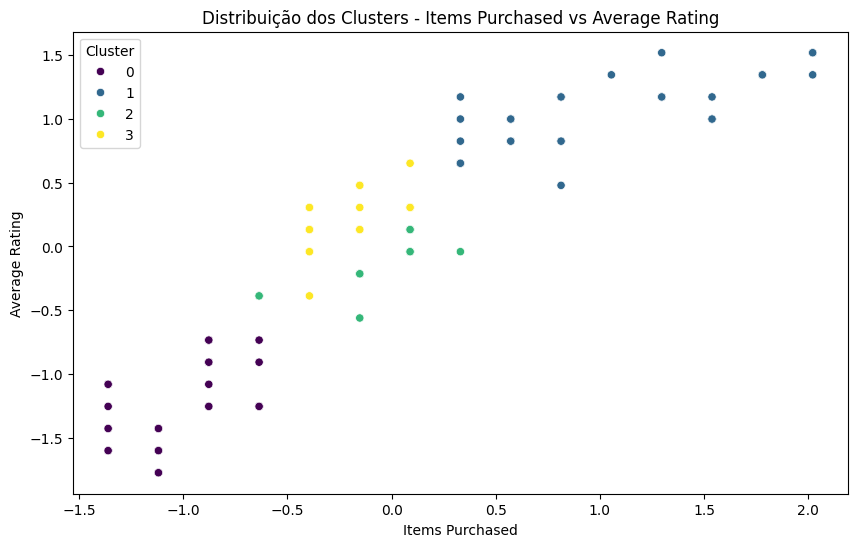

In [16]:
# Dispersão de Items Purchased vs Average Rating, colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Items Purchased', y='Average Rating', hue='Cluster', palette='viridis')
plt.title('Distribuição dos Clusters - Items Purchased vs Average Rating')
plt.show()

### 6.1 Visualizando e analizando o "Total Spend"

<Axes: xlabel='Total Spend'>

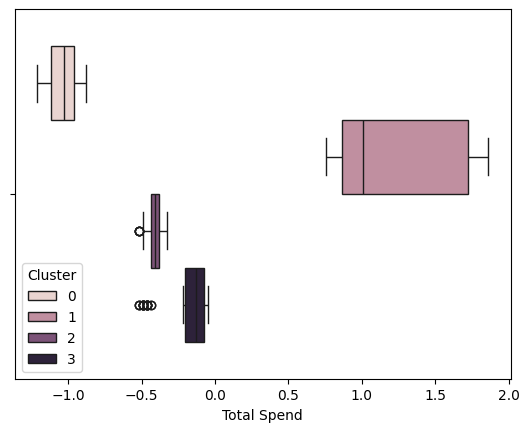

In [17]:
sns.boxplot(data=dados, x='Total Spend', hue='Cluster')

* cluster 0 -> Gasta menos que a media.
* cluster 1 -> O cluster com maior gasto.
* cluster 2 -> CLietes com gastos ligeiramente menos que a media. E possui agum valor muito abaixo, um outlier
* cluster 3 -> CLientes com um comportamento mais variavel que os de mais, sendo uma combinacao de valores baixos e medios, mas sem gastos altos.

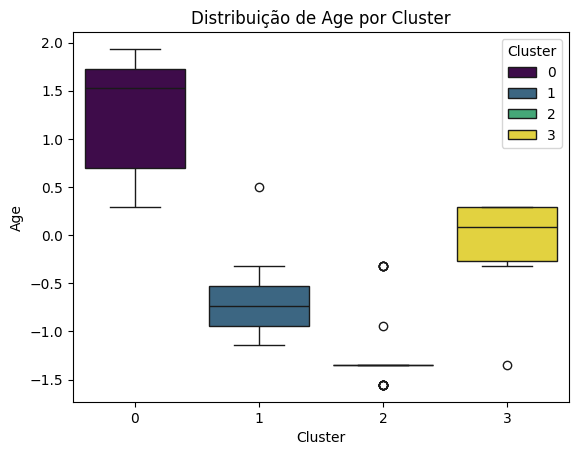

In [18]:
sns.boxplot(data=dados, x='Cluster', y='Age', palette='viridis', hue='Cluster')
plt.title('Distribuição de Age por Cluster')
plt.show()


* cluster 0 -> Clientes com as maiores idades.
* cluster 1 -> Clientes com idade ligeiramente menor que a media.
* cluster 2 -> Clientes com as menores idades entre os dados, e que apresenta mais outliers
* cluster 3 -> Clientes com as idades bem proximas da media global.

### 6.2 Distribuicao dos clusters

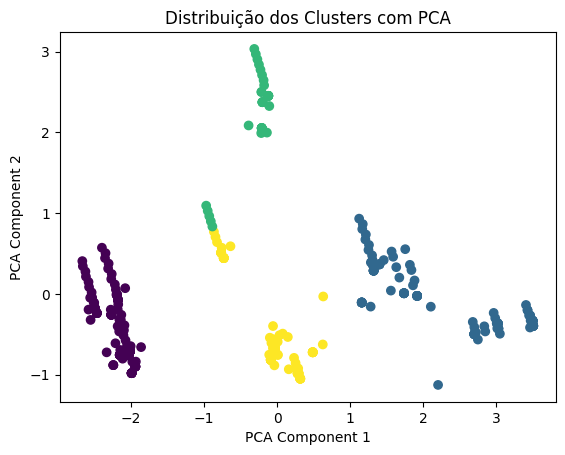

In [19]:
pca = PCA(n_components=2)
components = pca.fit_transform(dados[num_columns])
plt.scatter(components[:, 0], components[:, 1], c=dados['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Distribuição dos Clusters com PCA')
plt.show()


clusters relativamente bem separados e sem sobreposicao visual significativa, o que indica que os clientes dentro de cada cluster tem caracteristicas semelhantes. PAra determinar o quao bem seperados e o quao sobrepostos alguns pontos estao, sera usado o silhouette score

## 7. Silhouette Scorre

Para referencia:

* 0,7 a 1,0	Clusters fortemente definidos; alta separação entre grupos.
*  0,5 a 0,7	Boa separação entre clusters; clusters estão razoavelmente definidos.
* 0,25 a 0,5	Clusterização moderada; alguns grupos podem estar sobrepostos.
* 0,0 a 0,25	Clusters fracos; a separação entre clusters é baixa.
* Negativo (< 0)	Clusters mal formados; pontos podem estar no cluster errado.

In [20]:
silhouette = silhouette_score(dados[num_columns], dados['Cluster'])
print(f'O silhouette Score: {silhouette:.2f}')


O silhouette Score: 0.55


Valor 0.55 indica uma segmentao moderada a boa porem com espaco para melhorar. Temos uma boa separacao, mas ainda existe sobreposicao.

## 8. Analisando grafico do Silhouette Score

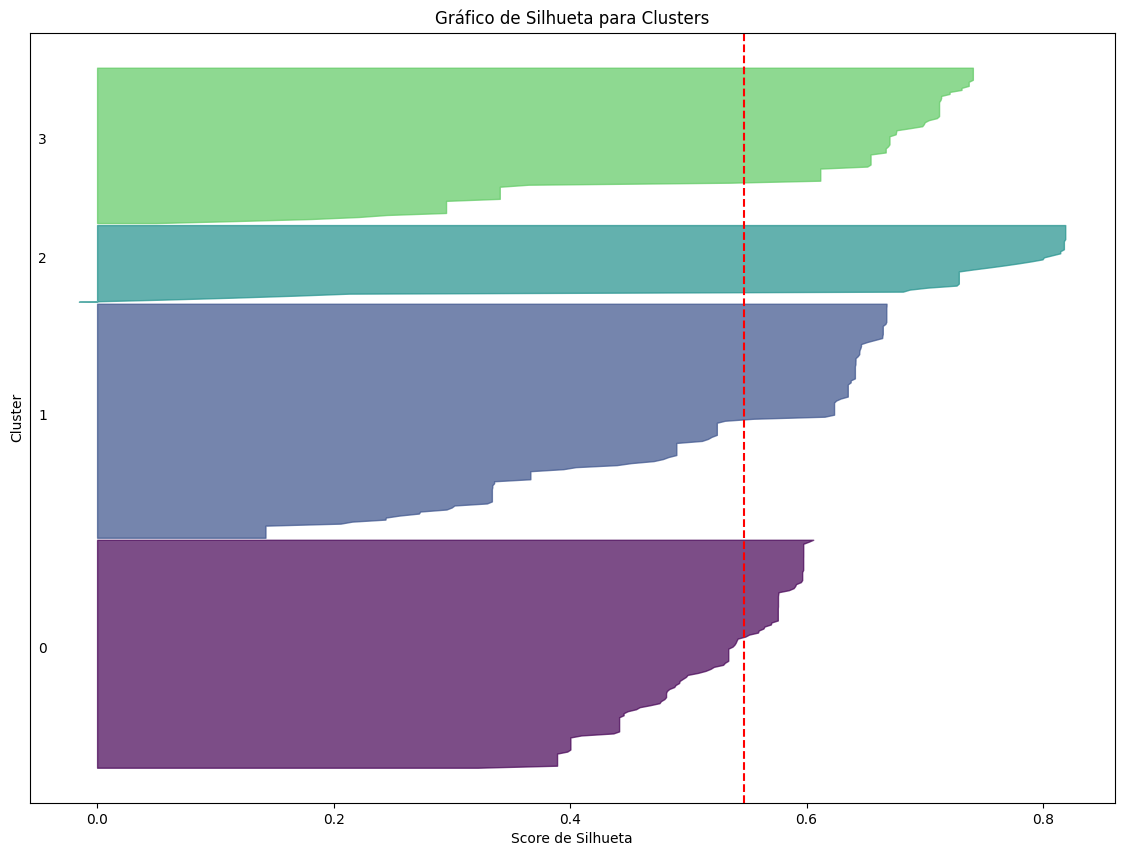

In [21]:
# Calcula os scores de silhueta para cada ponto
silhouette_vals = silhouette_samples(dados[num_columns], dados['Cluster'])

# Configurações do gráfico de silhueta
fig, ax = plt.subplots(figsize=(14, 10))
y_lower, y_upper = 0, 0
for i in range(4):  # Ajuste o range caso tenha escolhido outro valor de K
    cluster_silhouette_vals = silhouette_vals[dados['Cluster'] == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper

ax.set_title("Gráfico de Silhueta para Clusters")
ax.set_xlabel("Score de Silhueta")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_score(dados[num_columns], dados['Cluster']), color="red", linestyle="--")
ax.set_yticks([])
plt.show()


Distribuicao dos clusters:

Cluster 0: Com certa quantidade de pontos proximos a media, porem com alguns pontos bem abaixo, o que indica que estes pontos podem estar bem pretos de outros clusters indicando algum gau de sobreposicao.

CLuster 1: Distribuicao uniforme, com menos pontos abaixo da media que o cluster 0, o que indica que este esta bem separado.

Cluster 2: Cluster com a maior faixa de pontos, poucos pontos abaixo da media(porem pontos negativos), apesar um cluster bem definido e com baixa sobreposicao.

Cluster 3: Ampla distribuicao dos pontos, com a maioria acima da media o que indica um pontos bem alocados ao cluster, porem como alguns pontos permaneceram perto de 0 tem-se uma leve sobreposicao com outro clusters.

## 8. Melhoramento do Silhouette Score

Sera tentado:

1. Mudar o valor de k
2. Revisar as variaveis usadas
  * 2.2 Remocao ou adicao de variaveis


In [22]:
def create_kmeans(range_inicio:int, range_fim:int, dados=dados, num_columns=num_columns):
  for i in range(range_inicio, range_fim):
    kmeans = KMeans(n_clusters=i, random_state=42)
    dados['Cluster'] = kmeans.fit_predict(dados[num_columns])

    silhouette = silhouette_score(dados[num_columns], dados['Cluster'])
    print(f'O silhouette Score com {i} clusters: {silhouette:.4f}')


In [23]:
create_kmeans(2, 10)

O silhouette Score com 2 clusters: 0.4820
O silhouette Score com 3 clusters: 0.4610
O silhouette Score com 4 clusters: 0.5468
O silhouette Score com 5 clusters: 0.5901
O silhouette Score com 6 clusters: 0.6561
O silhouette Score com 7 clusters: 0.6332
O silhouette Score com 8 clusters: 0.6683
O silhouette Score com 9 clusters: 0.6620


A maxima atingiu com 8 clusters.

In [24]:
def grafico_silhouette(cluster:int):

  silhouette_vals = silhouette_samples(dados[num_columns], dados['Cluster'])

  fig, ax = plt.subplots(figsize=(10, 6))
  y_lower, y_upper = 0, 0
  for i in range(cluster):
      cluster_silhouette_vals = silhouette_vals[dados['Cluster'] == i]
      cluster_silhouette_vals.sort()
      y_upper += len(cluster_silhouette_vals)
      color = plt.cm.viridis(float(i) / cluster)
      ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
      ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
      y_lower = y_upper

  ax.set_title(f"Gráfico de Silhueta para {cluster} Clusters")
  ax.set_xlabel("Score de Silhueta:")
  ax.set_ylabel("Cluster")
  ax.axvline(x=silhouette_score(dados[num_columns], dados['Cluster']), color="red", linestyle="--")
  ax.set_yticks([])
  plt.show()

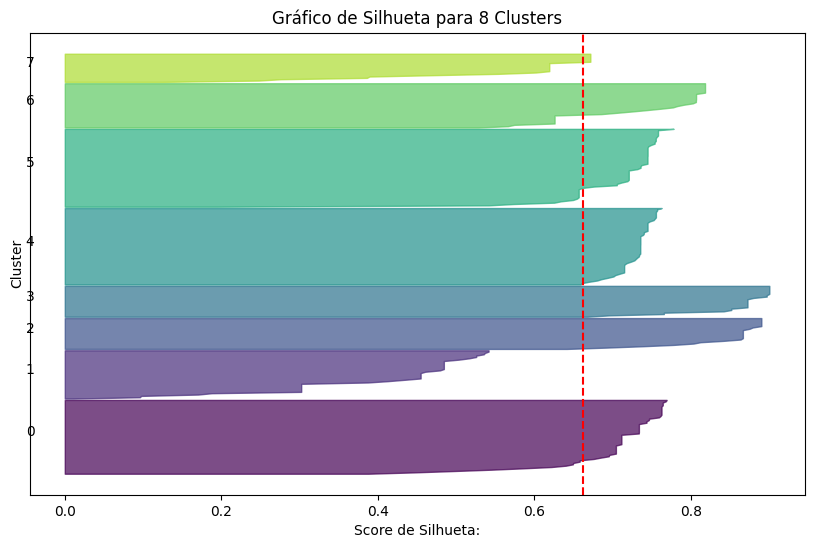

In [25]:
grafico_silhouette(8)

SObre o grafico:

Silhouette Score de 0.66 com 8 clusters, valor relativamente alto o indica que em sua maioria os valores estao bem separados dos outros clusters e compactos em seus clusters.

Pontos proximos de 0: Pouca quantidade, os quais indicam pouca sobreposicao entre clusters e que a maioria esta bem alocada em seus clusters.

CLiusters 0 e 6: possuem um distribuicao mais concentrada da media geral,
o que sugere clusters bem definidos e pontos bem agrupados.

Clusters 4 e 5: Tem uma variacao um pouco maior nos scores o que indica pontos proximos de outros clusters, mas sem deixar de estar razoavelmente bem definido.

Cluster 1: A maioria dos pontos esta bem agrupado, porem com um score abaixo da media geral, ele apresenta uma coesao ate aceitavel com uma qualidade inferior aos demais clusters. TAlvez pq suas caracteristicas sejam mais proximas a media e nao sejam exclusivas logo e um grupo menso diferenciado dos demais.

Cluster 7: com a maioria dos pontos em 0.6 e algums em 0.8 apresenta uma otima coesao e separacao. Trata-se de um lcusters compacto e bem separados indicando que possui caracteristicas bem especificas e distintas dos demais clusters.


porem mesmo alterando o numero de clusters o silhouette score ficou um tanto quanto perdo de 0.7, porem nao chegou ao valor, logo o proximo passo e usar as cariaveis categorias(nominais e orninais) para aumentar o valor do Score da silhoeta.

## 9. Analisando as variaveis categorias para inclusao do modelo k-means

As variaveis qe serao analisadas sao:

 * Membership Type e Satisfactin Level -> Categoricas ordinais
 * Discount Applied -> Valiavel boleana
 * Gender e City -> Categorica Nominais

### 9.1 Normalizao das categorias numericas

Fazendo o passo novamente para deixar em ordem com logica

In [26]:
scaler = StandardScaler()

#num_columns = colunas numericas
dados[num_columns] = scaler.fit_transform(dados[num_columns])
dados.head(3)

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
0,Female,-0.939761,New York,Gold,0.754230,0.330381,0.996757,True,-0.120022,Satisfied,1
1,Male,0.086720,Los Angeles,Silver,-0.186319,-0.394236,0.132172,False,-0.640260,Neutral,5
2,Female,1.934386,Chicago,Bronze,-0.933192,-0.877314,-1.078247,True,1.143413,Unsatisfied,4


### 9.2 Variaveil Ordinal: Membership Type

In [27]:
#qauntidade de valores a serem mapeados?
dados['Membership Type'].unique()
# 3 valores

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [28]:
member_map = {"Bronze": 1, "Silver": 2, "Gold": 3}
dados['Membership Type'] = dados['Membership Type'].map(member_map)
dados['Membership Type'].unique()


array([3, 2, 1])

### 9.3 Variaveil Ordinal: Satisfaction Level

In [29]:
#QUantas niveis de satisfacao existem nois dados?
dados['Satisfaction Level'].unique()
# 3 niveis

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

In [30]:
member_map = {"Unsatisfied": 1, "Neutral": 2, "Satisfied": 3}
dados['Satisfaction Level'] = dados['Satisfaction Level'].map(member_map)
dados['Satisfaction Level'].unique()

array([3, 2, 1])

## 9.4 Variavel Booleana: Discount Applied

In [31]:
#Como e boolena: True or false -> 1 or 0
dados['Discount Applied'] = dados['Discount Applied'].astype(int)
dados['Discount Applied'].unique()



array([1, 0])

## 9.5 Variaveis Nominais

Para as variavies nominais (Gender, City) sera realizado um One_Hot Encoding

In [32]:
dados = pd.get_dummies(dados, columns=['Gender', 'City'], drop_first=True)

### 9.6 Normalizacao das novas variaveis numericas

In [33]:
cat_columns = dados[['Membership Type', 'Satisfaction Level', 'Discount Applied']].columns
cat_columns

Index(['Membership Type', 'Satisfaction Level', 'Discount Applied'], dtype='object')

In [34]:
dados[cat_columns] = scaler.fit_transform(dados[cat_columns])
dados

,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,-0.939761,1.216880,0.754230,0.330381,0.996757,0.994269,-0.120022,1.171147,1,False,False,False,False,True,False
1,0.086720,-0.010582,-0.186319,-0.394236,0.132172,-1.005764,-0.640260,-0.031092,5,True,False,True,False,False,False
2,1.934386,-1.238043,-0.933192,-0.877314,-1.078247,0.994269,1.143413,-1.233332,4,False,False,False,False,False,False
3,-0.734465,1.216880,1.751261,1.538076,1.169674,-1.005764,-1.086179,1.171147,8,True,False,False,False,False,True
4,-1.350354,-0.010582,-0.352721,0.088842,-0.040745,0.994269,2.109570,-1.233332,6,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.323873,-0.010582,-0.519124,-0.635775,-0.386579,0.994269,1.143413,-1.233332,2,True,False,False,True,False,False
346,0.497312,-1.238043,-1.044635,-1.118853,-1.769915,-1.005764,0.028617,-0.031092,0,False,True,False,False,False,False
347,-0.734465,1.216880,0.949704,0.813459,0.823840,0.994269,0.102937,1.171147,1,False,False,False,False,True,False
348,0.086720,-0.010582,-0.187149,-0.394236,0.305089,-1.005764,-0.417301,-0.031092,5,True,False,True,False,False,False


nao e a melhor opcao usar o dataset todo para todos os passo. Aqui nao ouve problema pois se trata de 248 registros. Porem em um datasat maior seria necessario mais tempo para processar os passo usando todo o dataset, o melhor em tal caso seria usar parte por parte dos dados(Ex. separar as variaveis numericas das categoricas, processar e normalizar separado e depois juntar em um novo dataset normalizado.

In [39]:
print(f"Shape: {dados.shape}")
dados.head(3)

Shape: (348, 15)


,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,-0.939761,1.216880,0.754230,0.330381,0.996757,0.994269,-0.120022,1.171147,1,False,False,False,False,True,False
1,0.086720,-0.010582,-0.186319,-0.394236,0.132172,-1.005764,-0.640260,-0.031092,5,True,False,True,False,False,False
2,1.934386,-1.238043,-0.933192,-0.877314,-1.078247,0.994269,1.143413,-1.233332,4,False,False,False,False,False,False


## 10. K-means com todas as variveis

O metodo do cotovelo determinara o valor de K
Para isso, uma comparada de 2 a 10 clusters

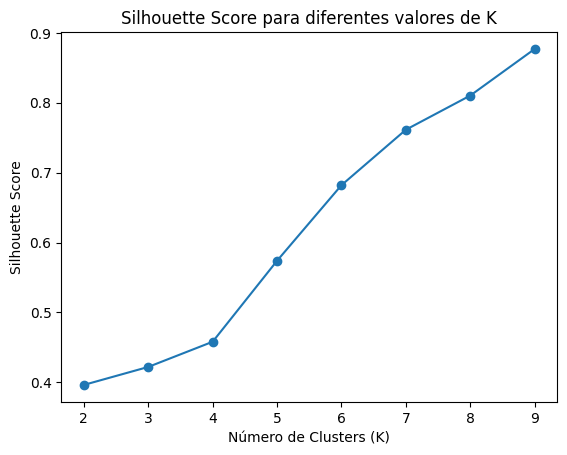

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Defina uma faixa de valores de K para testar
range_n_clusters = range(2, 10)
silhouette_scores = []

# Testa cada valor de K e calcula o Silhouette Score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dados)
    silhouette_avg = silhouette_score(dados, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Exibe o gráfico de Silhouette Scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.show()


Sera utilizado o primeiro valor de k que obteve um score maior que 0.7
E tambem testado o ultimo valor de k ande de obter um score de 0.7

In [46]:
dados['Cluster'].unique()

array([1, 5, 4, 8, 6, 0, 3, 2, 7], dtype=int32)

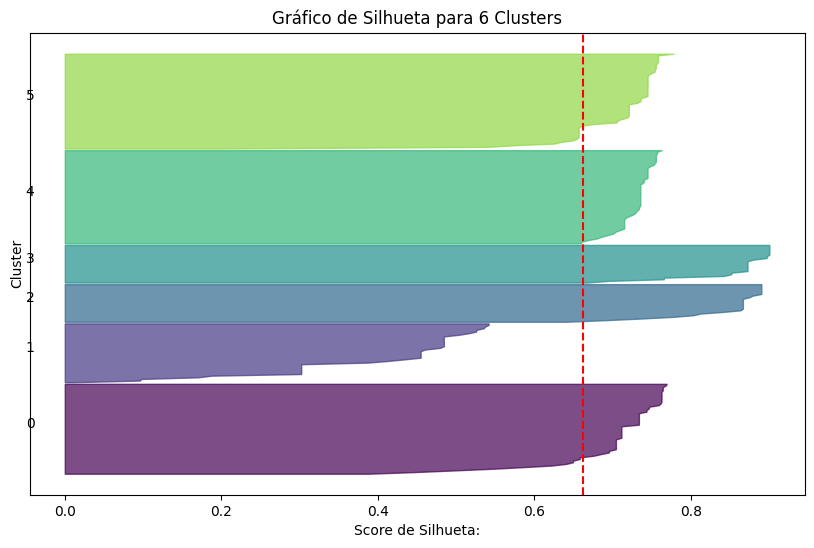

In [43]:
grafico_silhouette(6)


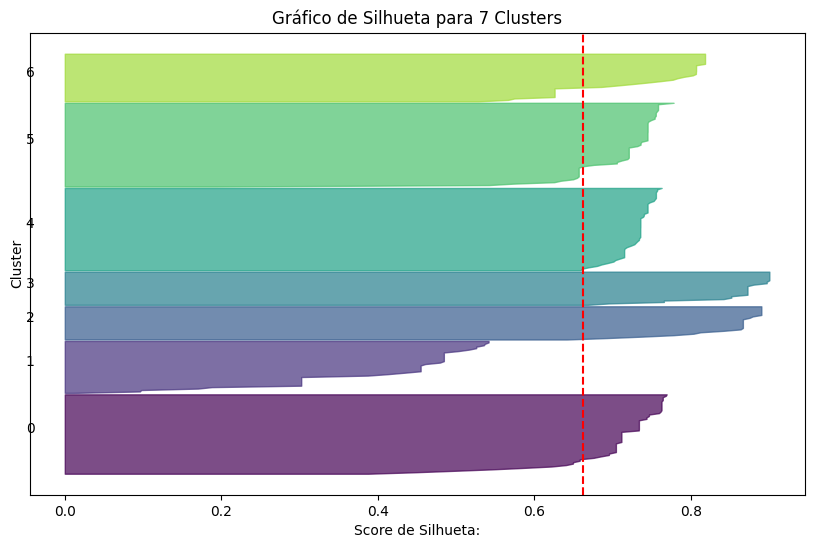

In [42]:
grafico_silhouette(7)


## 11. Analisando o K-means com 7 clusters


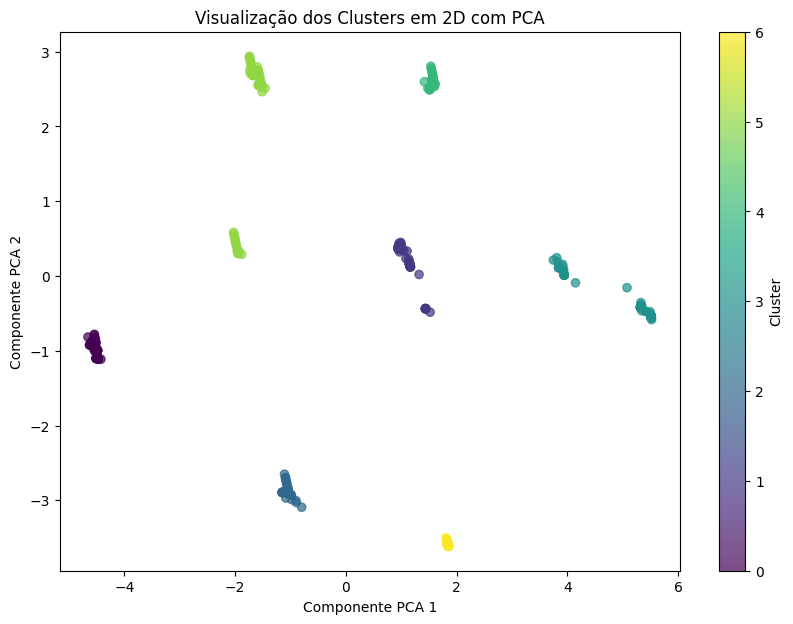

In [49]:
# Executa o KMeans com K = 7
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(dados)

pca = PCA(n_components=2)
componentes_pca = pca.fit_transform(dados)

# Cria o scatter plot dos clusters em duas dimensões
plt.figure(figsize=(10, 7))
plt.scatter(componentes_pca[:, 0], componentes_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.title('Visualização dos Clusters em 2D com PCA')
plt.show()


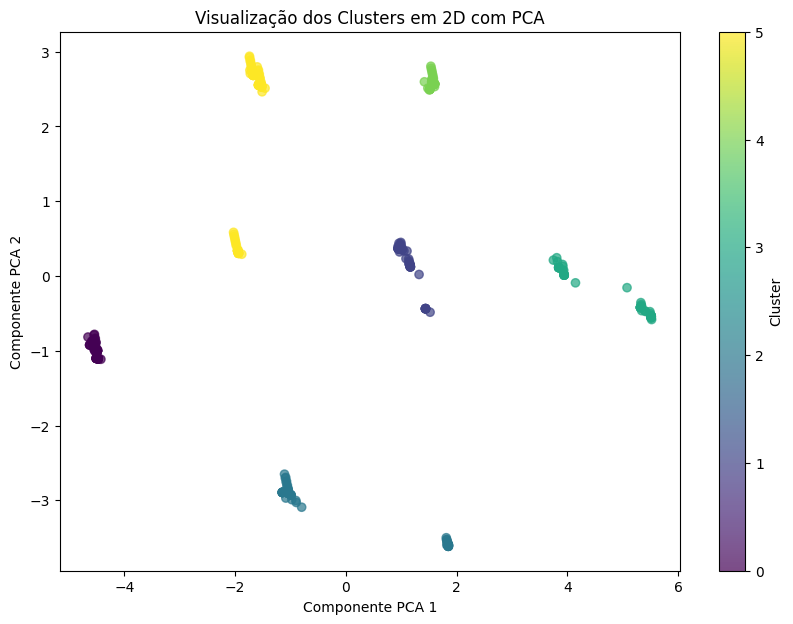

In [51]:
# Executa o KMeans com K = 6
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(dados)

#PCA = 2
pca = PCA(n_components=2)
componentes_pca = pca.fit_transform(dados)


plt.figure(figsize=(10, 7))
plt.scatter(componentes_pca[:, 0], componentes_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.title('Visualização dos Clusters em 2D com PCA')
plt.show()

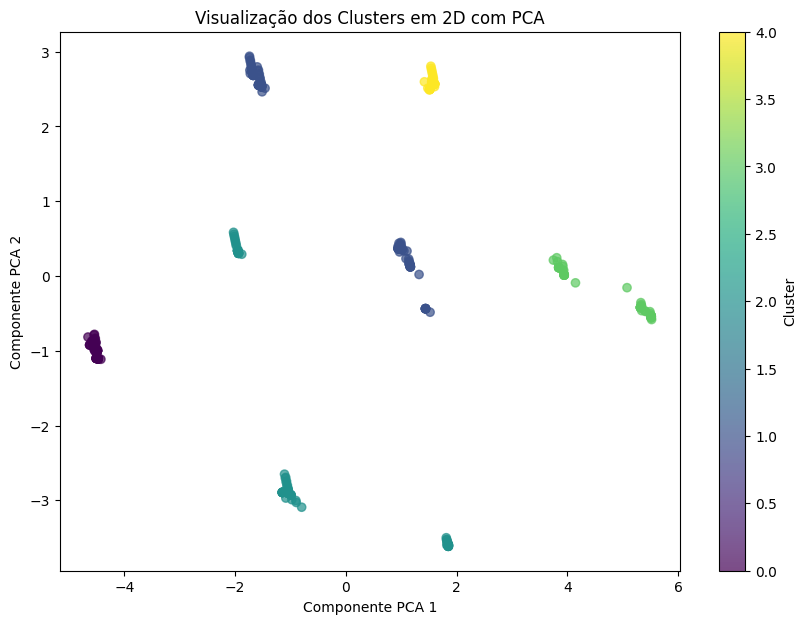

In [52]:
# Executa o KMeans com K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(dados)

#PCA = 2
pca = PCA(n_components=2)
componentes_pca = pca.fit_transform(dados)


plt.figure(figsize=(10, 7))
plt.scatter(componentes_pca[:, 0], componentes_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.title('Visualização dos Clusters em 2D com PCA')
plt.show()

# 9.5 Juntandos os dois dataset

dados_categoricos_normaizados + dados_numericos_normalizados

## 90. Analisando as variaveis categorias para inclusao do modelo k-means

As variaveis qe serao analisadas sao:

 * Membership Type e Satisfactin Level -> Categoricas ordinais
 * Discount Applied -> Valiavel boleana
 * Gender e City -> Categorica Nominais

### 9.1 Variaveis Nominais

Para as variavies nominais (Gender, City) sera realizado um One_Hot Encoding

In [36]:
#dados = dados.drop(columns='Cluster')
dados

,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,-0.939761,1.216880,0.754230,0.330381,0.996757,0.994269,-0.120022,1.171147,1,False,False,False,False,True,False
1,0.086720,-0.010582,-0.186319,-0.394236,0.132172,-1.005764,-0.640260,-0.031092,5,True,False,True,False,False,False
2,1.934386,-1.238043,-0.933192,-0.877314,-1.078247,0.994269,1.143413,-1.233332,4,False,False,False,False,False,False
3,-0.734465,1.216880,1.751261,1.538076,1.169674,-1.005764,-1.086179,1.171147,8,True,False,False,False,False,True
4,-1.350354,-0.010582,-0.352721,0.088842,-0.040745,0.994269,2.109570,-1.233332,6,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.323873,-0.010582,-0.519124,-0.635775,-0.386579,0.994269,1.143413,-1.233332,2,True,False,False,True,False,False
346,0.497312,-1.238043,-1.044635,-1.118853,-1.769915,-1.005764,0.028617,-0.031092,0,False,True,False,False,False,False
347,-0.734465,1.216880,0.949704,0.813459,0.823840,0.994269,0.102937,1.171147,1,False,False,False,False,True,False
348,0.086720,-0.010582,-0.187149,-0.394236,0.305089,-1.005764,-0.417301,-0.031092,5,True,False,True,False,False,False


In [37]:
dados_categoricos = dados.drop(columns=num_columns)
dados_categoricos = pd.get_dummies(dados_categoricos, columns=['Gender', 'City'], drop_first=True) #Com uma coluna excluida par ano dar multicolinearidade

KeyError: "None of [Index(['Gender', 'City'], dtype='object')] are in the [columns]"

In [ ]:
dados_categoricos.head()

### 9.2 Variaveil Ordinal: Membership Type

In [ ]:
#qauntidade de valores a serem mapeados?
dados_categoricos['Membership Type'].unique()
# 3 valores

In [ ]:
member_map = {"Bronze": 1, "Silver": 2, "Gold": 3}
dados_categoricos['Membership Type'] = dados_categoricos['Membership Type'].map(member_map)
dados_categoricos['Membership Type'].unique()
#Agora a a variavel categorica Membership Type esta codificada como numberica e apta a ser usada pelo K-means

### 9.3 Variaveil Ordinal: Satisfaction Level

In [ ]:
#QUantas niveis de satisfacao existem nois dados?
dados_categoricos['Satisfaction Level'].unique()
# 3 niveis

In [ ]:
member_map = {"Unsatisfied": 1, "Neutral": 2, "Satisfied": 3}
dados_categoricos['Satisfaction Level'] = dados_categoricos['Satisfaction Level'].map(member_map)
dados_categoricos['Satisfaction Level'].unique()

### 9.3 Variavel Booleana: Discount Applied

In [ ]:
#Como e boolena: True or false -> 1 or 0
dados_categoricos['Discount Applied'] = dados_categoricos['Discount Applied'].astype(int)
dados_categoricos['Discount Applied'].unique()

In [ ]:
dados_categoricos.head()

### 9.4 Normalizacao das novas variaveis numericas

In [ ]:
novas_colunas = dados_categoricos.columns

In [ ]:
dados_categoricos_normalizados = pd.DataFrame(scaler.fit_transform(dados_categoricos), columns=novas_colunas)
dados_categoricos_normalizados.tail()